In [2]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
#original image
orig = Image.open("mandelbrotbw.png")

#converting into matrix
image = Image.open("mandelbrotbw.png").convert('L')
image = np.asarray(image)

#Let the image be a matrix A of NXN dimension
#converting from 255 scale to 1 
A = (image/255).astype(int)

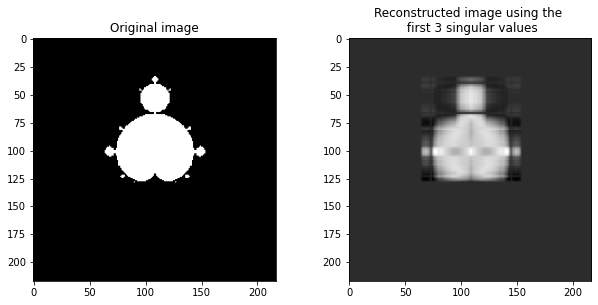

In [4]:
mat = A
U, s, VT = LA.svd(mat)
Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 3
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

In [5]:
def anim_svd(A,k):
    mat = A
    U, s, VT = LA.svd(mat)
    Sigma = np.zeros((mat.shape[0], mat.shape[1]))
    Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)
    
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    #plt.imshow(mat_approx,animated=True)
    return mat_approx

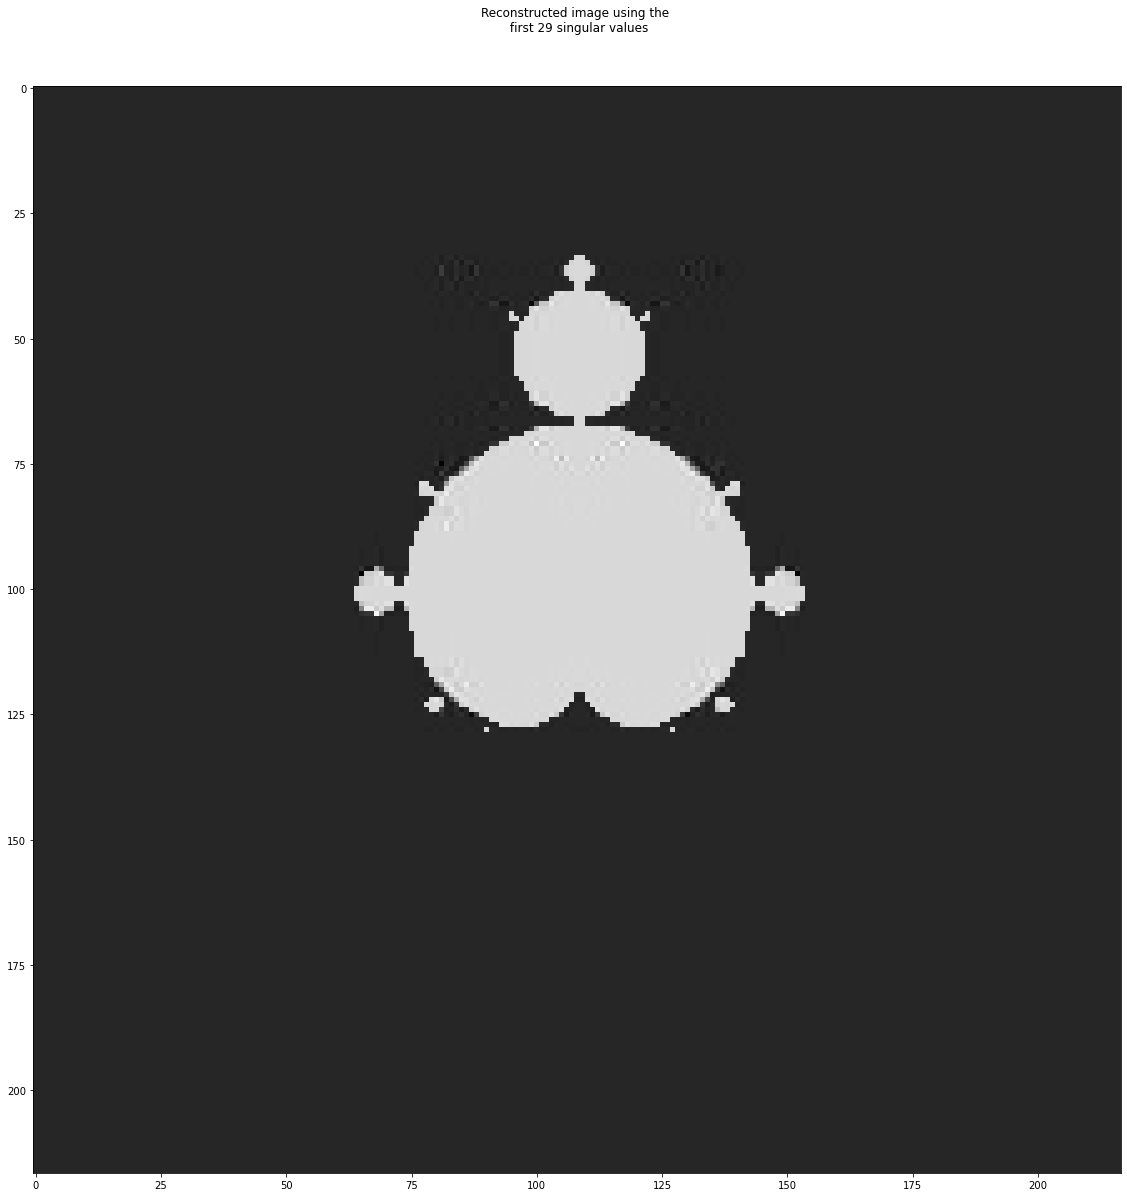

In [7]:
tot_frames = [anim_svd(A,k) for k in range(30)]
fig, ax = plt.subplots() 
frames=[]
for i in range(len(tot_frames)):
    img = plt.imshow(tot_frames[i], animated=True, cmap="gray")
    title = ax.text(0.5,1.05,"Reconstructed image using the \n first {} singular values".format(i), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", 
                    transform=ax.transAxes)
    frames.append([img,title])

    
ani = animation.ArtistAnimation(fig, frames, interval=1, blit=False, repeat_delay=1000)
ani.save("svd.gif")